# Applying Principal Component Analysis

## Loading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# Load data
df = pd.read_csv('countries.csv')
df.head()

,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,...,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


## Preprocessing

In [2]:
# replace variables names to more meaningful ones
df_names = pd.read_html('https://data.cmucreatelab.org/earthtime/WorldBank/')

df_names = df_names[0].set_index('Indicator Code')
df = df.rename(columns={c: df_names.loc[c]['Indicator Name'] for c in df.columns[2:]})

# shorten variable names for plotting
df = df.rename(columns={c: c.split('(')[0] for c in df.columns[2:]})

# drop country column
df = df.drop(columns=['Country'])
df = df.set_index('Country Groups')
df.head()

,"Foreign direct investment, net inflows",Access to electricity,Refugee population by country or territory of origin,CO2 emissions,"Inflation, consumer prices",Mobile cellular subscriptions,Individuals using the Internet,Exports of goods and services,Imports of goods and services,GDP per capita,"Mortality rate, adult, female","Mortality rate, adult, male","Birth rate, crude","Death rate, crude","Mortality rate, infant","Life expectancy at birth, total","Fertility rate, total","Population ages 80 and above, male",Urban land area where elevation is below 5 meters
Country Groups,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,53.038989,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,43.747235,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,27.095971,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,27.370720,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,29.112597,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


## Inspect data


The following plot shows that most of the variables in this dataset are highly positively or negatively correlated with at least one other variable. Examples of correlated variables are the variables measuring the death rate of men, women and infants, and the variables measuring use of cell phones and the internet. This makes the dataset a good candidate for PCA. 


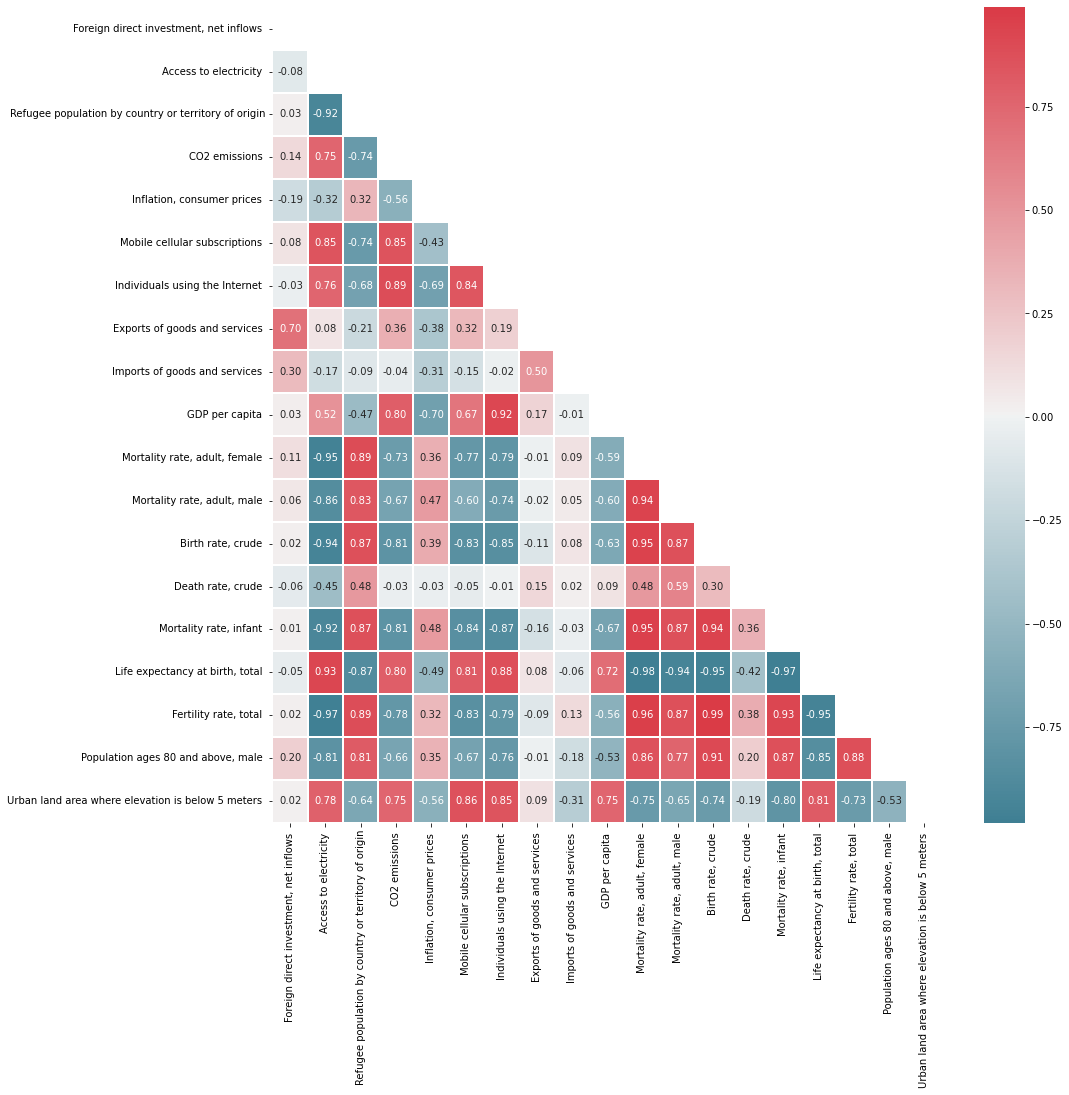

In [3]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

## Apply PCA

In [4]:
# drop rows with missing values
df = df.dropna()

# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 5
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3,4
Country Groups,,,,,
Central Europe and the Baltics,-3.924609,3.315577,-0.842078,2.356141,2.117642
Caribbean small states,-2.260250,2.044123,1.427297,0.949317,0.775756
East Asia & Pacific (excluding high income),-1.787740,-1.080702,1.057935,-0.020315,0.508347
Early-demographic dividend,0.808716,-1.507746,0.643473,0.165625,0.457137
East Asia & Pacific,-2.287916,-0.782774,0.612767,-0.112555,0.866271


The Principle components are uncorrelated, showing that PCA has summarised all related information in a smaller number of variables. 

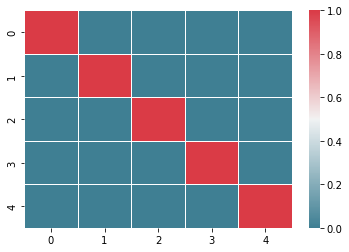

In [5]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

### Interpreting PCA

We can access the correlations between the components and original variables using the components_ method of our PCA() object.


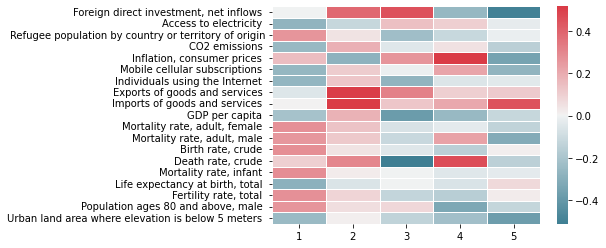

In [6]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

# Loading Iris dataset

In [7]:
# loading dataset into a dataframe
iris_df =pd.read_csv('iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Correlation Between features

In [8]:
# extracte features from the dataframe
X = iris_df.iloc[:,1:5]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


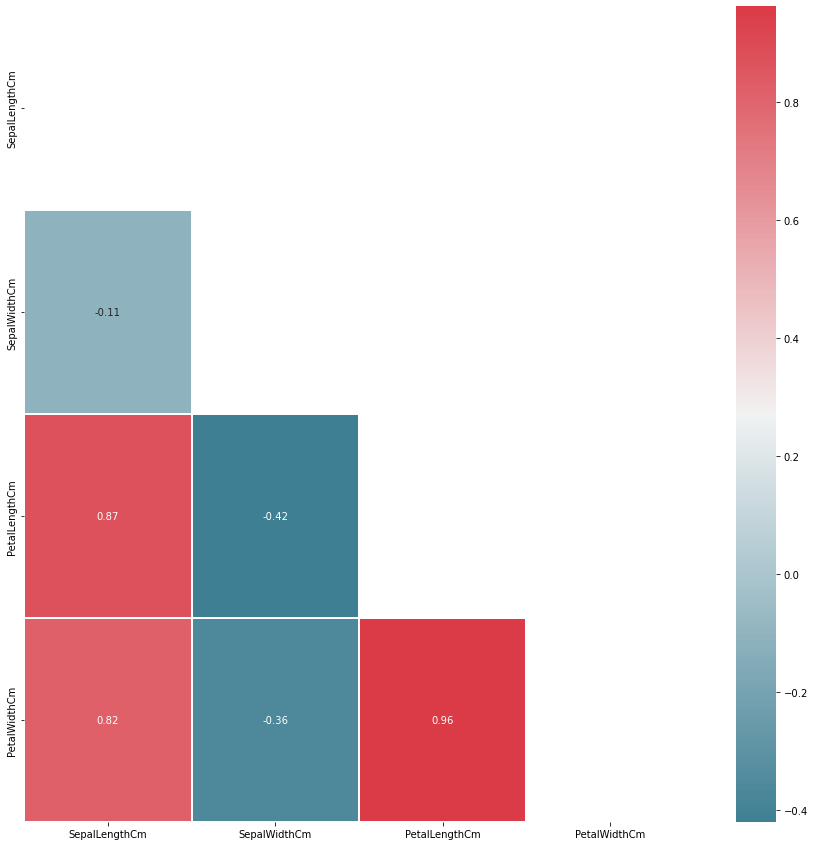

In [9]:
# plot the features correlations
colormap = sns.diverging_palette(220, 10, as_cmap=True)

corr_heatmap(X)

# Data Scaling

In [11]:
# scaler object
scaler = MinMaxScaler()

# transforming the data
X_scaled = scaler.fit_transform(X.values)

# Principle Component Analysis (PCA)

In [16]:
# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X_scaled)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components)

pca_df.head()

,0,1,2
0,-0.630361,0.111556,-0.016993
1,-0.623546,-0.100313,-0.047120
2,-0.669793,-0.047220,0.021648
3,-0.654633,-0.098791,0.025214
4,-0.648263,0.137558,0.016813


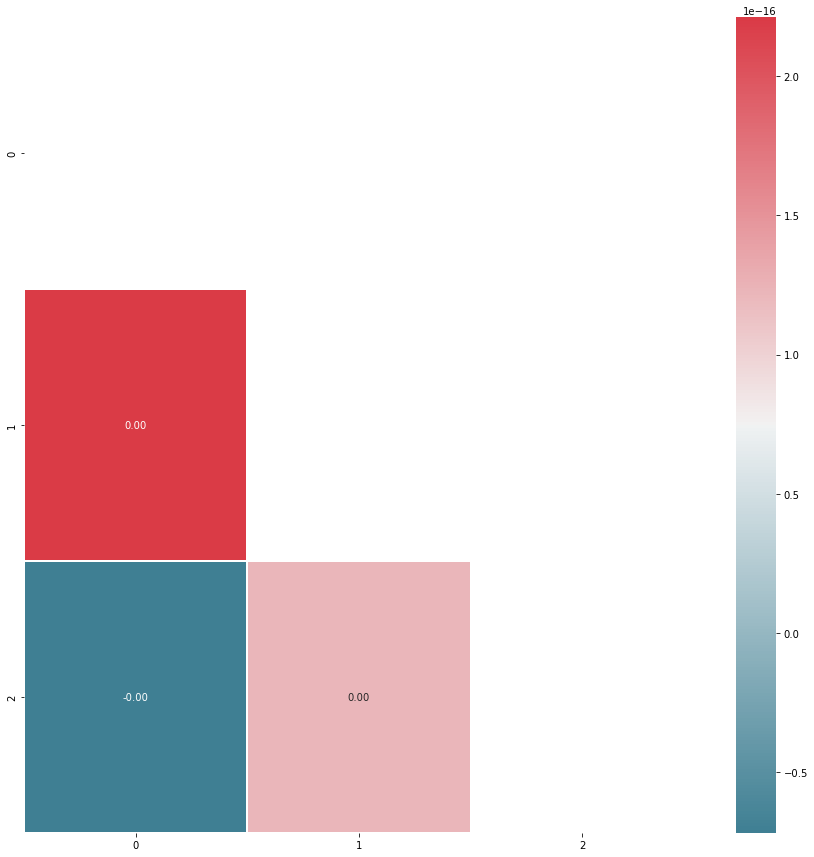

In [18]:
# plot the transformed version of the data
colormap = sns.diverging_palette(220, 10, as_cmap=True)

corr_heatmap(pca_df)

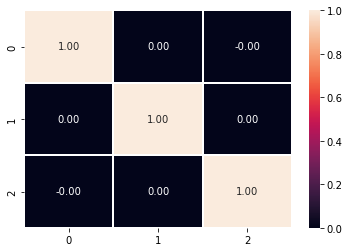

In [20]:
sns.heatmap(pca_df.corr(),annot=True, fmt=".2f", linewidth=2);

The dimensions of the features plot have reduced from 4 to 3. It looks like the petal width or petal length are the redundancy that is likely to have been removed because they showed the highest correlation.